## CMIP6 stuff

In [15]:
import xarray as xr

file_path = "ta_Amon_CESM2_ssp585_r4i1p1f1_gn_20150115-20991215.nc"
ds = xr.open_dataset(file_path)

print(ds.data_vars)


Data variables:
    ta         (time, plev, lat, lon) float32 451MB ...
    time_bnds  (time, nbnd) object 16kB ...
    lat_bnds   (time, lat, nbnd) float64 3MB ...
    lon_bnds   (time, lon, nbnd) float64 5MB ...


In [16]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


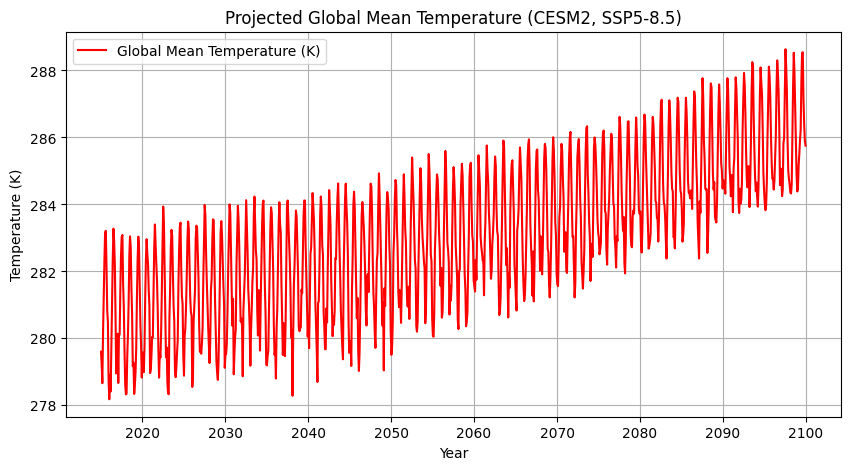

In [17]:
# Load dataset
ds = xr.open_dataset("ta_Amon_CESM2_ssp585_r4i1p1f1_gn_20150115-20991215.nc") 

# Define the variable name
var_name = "ta"  # Ensure this matches the actual variable in your dataset

# Take the global mean by averaging over latitude, longitude, and pressure levels
global_temp = ds[var_name].mean(dim=['lat', 'lon', 'plev']).squeeze()

# Convert the CFTime index to a standard datetime format
time_series = global_temp.to_dataframe().reset_index()
time_series['time'] = pd.to_datetime(time_series['time'].astype(str))  # Convert CFTime to pandas datetime

# Plot global temperature trend
plt.figure(figsize=(10, 5))
plt.plot(time_series['time'], time_series[var_name], label="Global Mean Temperature (K)", color='red')
plt.xlabel("Year")
plt.ylabel("Temperature (K)")
plt.title("Projected Global Mean Temperature (CESM2, SSP5-8.5)")
plt.legend()
plt.grid()

plt.show()



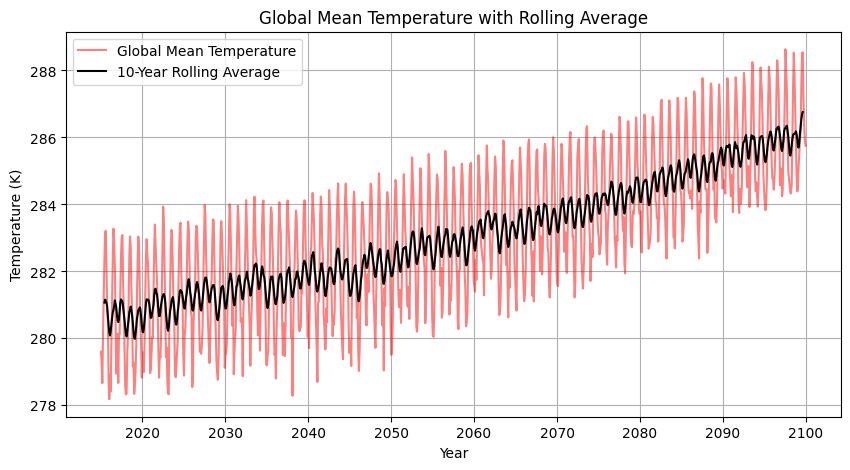

In [18]:
# Compute rolling mean with a window of 10 years
time_series['rolling_avg'] = time_series[var_name].rolling(window=10, center=True).mean()

plt.figure(figsize=(10, 5))
plt.plot(time_series['time'], time_series[var_name], label="Global Mean Temperature", color='red', alpha=0.5)
plt.plot(time_series['time'], time_series['rolling_avg'], label="10-Year Rolling Average", color='black')
plt.xlabel("Year")
plt.ylabel("Temperature (K)")
plt.title("Global Mean Temperature with Rolling Average")
plt.legend()
plt.grid()
plt.show()


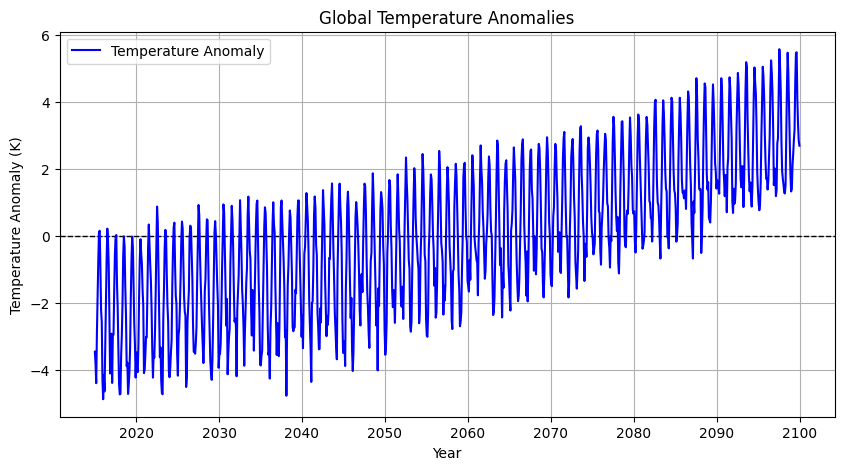

In [19]:
# Compute temperature anomaly (deviation from mean)
time_series['anomaly'] = time_series[var_name] - time_series[var_name].mean()

plt.figure(figsize=(10, 5))
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.plot(time_series['time'], time_series['anomaly'], label="Temperature Anomaly", color='blue')
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.title("Global Temperature Anomalies")
plt.legend()
plt.grid()
plt.show()


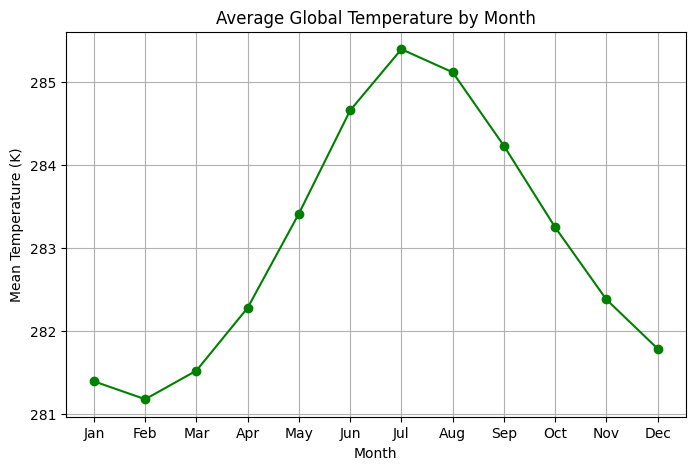

In [20]:
# Extract month from the time column
time_series['month'] = time_series['time'].dt.month

# Compute mean temperature for each month
monthly_avg = time_series.groupby('month')[var_name].mean()

plt.figure(figsize=(8, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='green')
plt.xlabel("Month")
plt.ylabel("Mean Temperature (K)")
plt.title("Average Global Temperature by Month")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


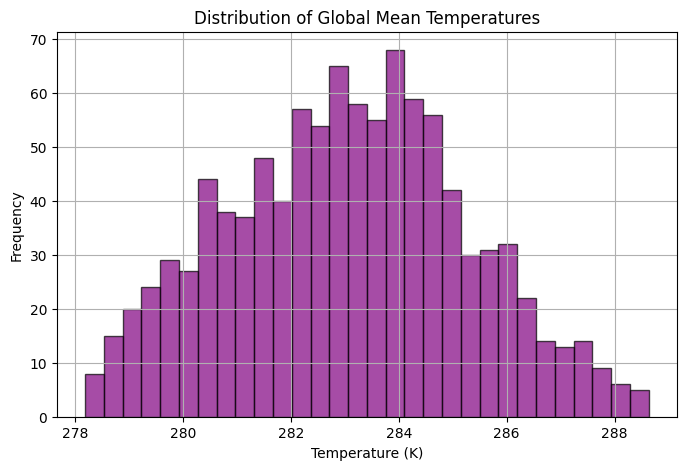

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(time_series[var_name], bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel("Temperature (K)")
plt.ylabel("Frequency")
plt.title("Distribution of Global Mean Temperatures")
plt.grid()
plt.show()
